# Local Polynomial Regression - Utkarsh Gaikwad

### Fetch the Data 

In [477]:
import yfinance as yf
from warnings import filterwarnings
filterwarnings('ignore')
ticker = 'SBIN.NS'
d = yf.download(ticker,period='1y')
d.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-05,461.000000,462.500000,438.399994,441.850006,435.060394,58595639
2021-08-06,443.700012,447.000000,434.000000,435.649994,428.955658,38236066
2021-08-09,437.899994,441.799988,431.000000,433.399994,426.740234,22196404
2021-08-10,434.399994,436.399994,421.700012,426.450012,419.897034,27794251
2021-08-11,429.799988,432.899994,423.149994,428.049988,421.472443,23827946


### Considering only Adjusted Close 

In [478]:
df = d[['Adj Close']]

### Adding Day numbers starting from 1

In [479]:
ds = []
for i in range(len(df)):
    ds.append(i+1)
ds

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

### Adding Day number in DataFrame

In [480]:
df['Day']=ds

In [481]:
df.head()

,Adj Close,Day
Date,,
2021-08-05,435.060394,1
2021-08-06,428.955658,2
2021-08-09,426.740234,3
2021-08-10,419.897034,4
2021-08-11,421.472443,5


### Creating Overall Polynomial fit

In [482]:
import numpy as np
mymodel = np.poly1d(np.polyfit(df['Day'],df['Adj Close'],6))
df['Predicted']=mymodel(ds)
df.head()

,Adj Close,Day,Predicted
Date,,,
2021-08-05,435.060394,1,414.923806
2021-08-06,428.955658,2,414.419051
2021-08-09,426.740234,3,414.090550
2021-08-10,419.897034,4,413.928091
2021-08-11,421.472443,5,413.921803


### Plotting the overall polynomial fit 

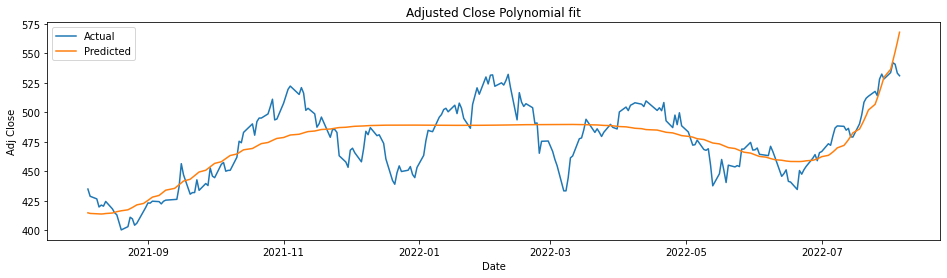

In [483]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(df['Adj Close'],label='Actual')
plt.plot(df['Predicted'],label='Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Adjusted Close Polynomial fit')
plt.legend()
plt.show()

### Checking Mean Squared Error and R2 Score for overall model

In [484]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(df['Predicted'],df['Adj Close'])
r2 = r2_score(df['Predicted'],df['Adj Close'])
print('Mean Squared Error : ',round(mse,2))
print('R2 Score           : ',round(r2,4))

Mean Squared Error :  382.76
R2 Score           :  0.3906


### Creating Local Regression Model with rolling r , degree n

In [485]:
r = 50
c = 0
n = 2
prd = []
mymodel = np.poly1d(np.polyfit(df['Day'][0:r-1],df['Adj Close'][0:r-1],n))
p = mymodel(ds[0:r-1])
prd.extend(p)
for i in range(len(df)-r+1):
    mymodel = np.poly1d(np.polyfit(df['Day'][c:c+r-1],df['Adj Close'][c:c+r-1],n))
    p = mymodel(ds[c:c+r-1])
    prd.append(p[-1])
    c = c+1 

In [486]:
len(prd)

251

### Checking Metrics for Local Prediction Model

In [487]:
mean_squared_error(prd,df['Adj Close'])

326.4943267939684

In [488]:
r2_score(prd,df['Adj Close'])

0.755962222203072

### Adding Local predictions to Dataframe

In [489]:
df['Local Pred']=prd

In [490]:
df.head()

,Adj Close,Day,Predicted,Local Pred
Date,,,,
2021-08-05,435.060394,1,414.923806,423.321283
2021-08-06,428.955658,2,414.419051,422.332474
2021-08-09,426.740234,3,414.090550,421.432164
2021-08-10,419.897034,4,413.928091,420.620355
2021-08-11,421.472443,5,413.921803,419.897047


### Plotting Actual Adjusted Close with Local Regression and Overall Polynomial Fit

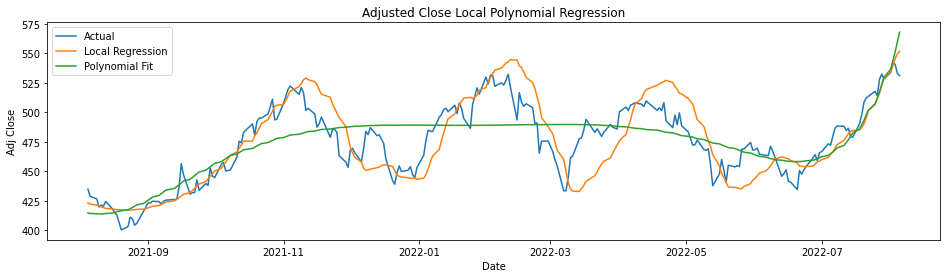

In [491]:
plt.figure(figsize=(16,4))
plt.plot(df['Adj Close'],label='Actual')
plt.plot(df['Local Pred'],label='Local Regression')
plt.plot(df['Predicted'],label='Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Adjusted Close Local Polynomial Regression')
plt.legend()
plt.show()

### Checking Residuals

In [492]:
df['Residual']=df['Adj Close']-df['Local Pred']

Text(0.5, 1.0, 'Residuals for Local Regression')

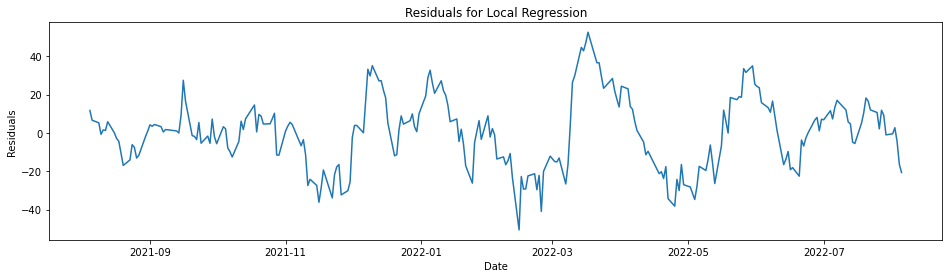

In [493]:
plt.figure(figsize=(16,4))
plt.plot(df['Residual'])
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals for Local Regression')

### Adding Upper and Lower bounds using rolling standard deviation 

In [494]:
df['Upper']=df['Local Pred'] + 3*df.Residual.rolling(r).std()
df['Lower']=df['Local Pred'] - 3*df.Residual.rolling(r).std() 
df.tail()

,Adj Close,Day,Predicted,Local Pred,Residual,Upper,Lower
Date,,,,,,,
2022-08-01,533.750000,247,536.511238,534.220535,-0.470535,573.713967,494.727103
2022-08-02,542.099976,248,543.671436,539.370106,2.729870,578.586521,500.153690
2022-08-03,540.849976,249,551.280015,545.371921,-4.521946,584.560666,506.183176
2022-08-04,533.250000,250,559.355002,549.572501,-16.322501,588.155977,510.989025
2022-08-05,531.049988,251,567.914907,551.713284,-20.663296,590.190725,513.235842


In [495]:
k = df.Residual.rolling(r).std()[r-1]
for i in range(r):
    df['Upper'][i]=df['Local Pred'][i] + 3*k
    df['Lower'][i]=df['Local Pred'][i] - 3*k

In [496]:
df.head()

,Adj Close,Day,Predicted,Local Pred,Residual,Upper,Lower
Date,,,,,,,
2021-08-05,435.060394,1,414.923806,423.321283,11.739111,447.581261,399.061306
2021-08-06,428.955658,2,414.419051,422.332474,6.623184,446.592451,398.072496
2021-08-09,426.740234,3,414.090550,421.432164,5.308070,445.692141,397.172187
2021-08-10,419.897034,4,413.928091,420.620355,-0.723322,444.880333,396.360378
2021-08-11,421.472443,5,413.921803,419.897047,1.575395,444.157024,395.637070


### Plotting Local Polynomial Regression with Upper and Lower bounds  

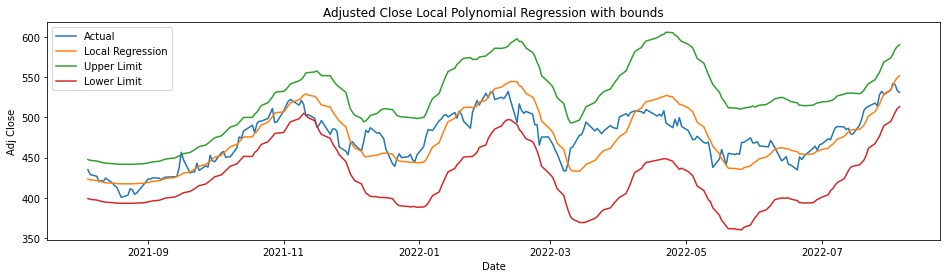

In [497]:
plt.figure(figsize=(16,4))
plt.plot(df['Adj Close'],label='Actual')
plt.plot(df['Local Pred'],label='Local Regression')
plt.plot(df['Upper'],label='Upper Limit')
plt.plot(df['Lower'],label='Lower Limit')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Adjusted Close Local Polynomial Regression with bounds')
plt.legend()
plt.show()

In [498]:
df.tail(1)

,Adj Close,Day,Predicted,Local Pred,Residual,Upper,Lower
Date,,,,,,,
2022-08-05,531.049988,251,567.914907,551.713284,-20.663296,590.190725,513.235842


### Predicting tomorrows price for Share

In [499]:
l = len(df)-r
mymodel = np.poly1d(np.polyfit(df['Day'][l:],df['Adj Close'][l:],n))
p = mymodel(df['Day'][-1]+1)
b = df['Upper'][-1]-df['Local Pred'][-1]

In [500]:
print('Tomorrows Prediction : ', round(p,2),'+/-',round(b,2))
print('Tomorrows Upper      : ', round(p+b,2))
print('Tomorrows Lower      : ', round(p-b,2))

Tomorrows Prediction :  558.27 +/- 38.48
Tomorrows Upper      :  596.75
Tomorrows Lower      :  519.8
